In [1]:
import pandas as pd

fit_df = pd.read_csv('../spam_text_data/bg_message_vector.csv')

In [2]:
print(fit_df.shape)

(200, 1164)


In [3]:
test_arr = fit_df.to_numpy()

In [4]:
fit_df_text = pd.read_csv('../spam_text_data/combo_message.csv')

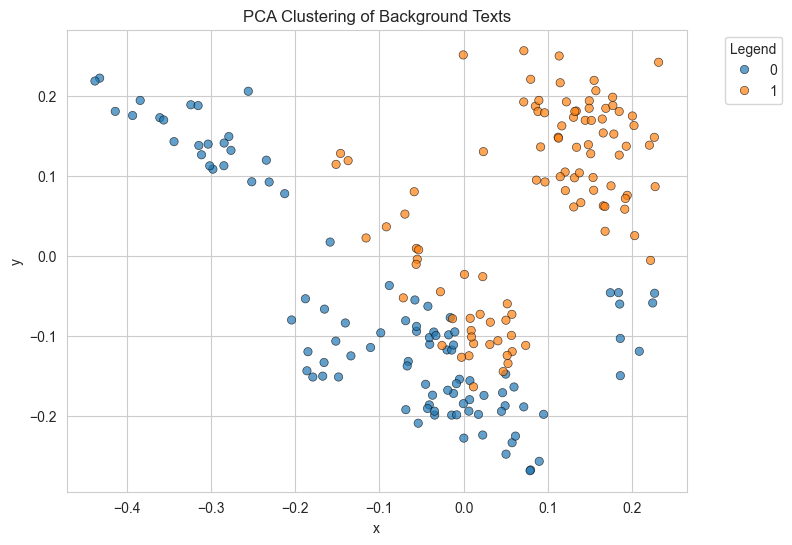

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
transformed_data = pca.fit_transform(fit_df)




import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'x': transformed_data[:, 0],
    'y': transformed_data[:, 1],
    'label': fit_df_text["scam_flag"]
})

sns.set_style("whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(
    data=df, x='x', y='y', hue='label', palette='tab10', alpha=0.7, edgecolor="black"
)

plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA Clustering of Background Texts')
plt.show()


In [6]:
test1 = pd.read_csv('../spam_text_data/test_message_vector.csv')
test1.head()

,00,000,10,11,110,112679,114998,12,120,123,...,www,xyz,year,yes,you,your,yours,zelle,zen,zpass
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.408541,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.109489,0.0,0.0,0.0,0.0
1,0.0,0.0,0.253844,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.259553,0.0,0.453305,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.076804,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [7]:
import time

test1_arr = test1.to_numpy()

start_time = time.time()
new_projection = pca.transform(test1_arr)
end_time = time.time()

transform_time = end_time - start_time

/Users/avinanakarmi/school/AdvML/mids/.env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [8]:
test1_text = pd.read_csv('../spam_text_data/test_all.csv')

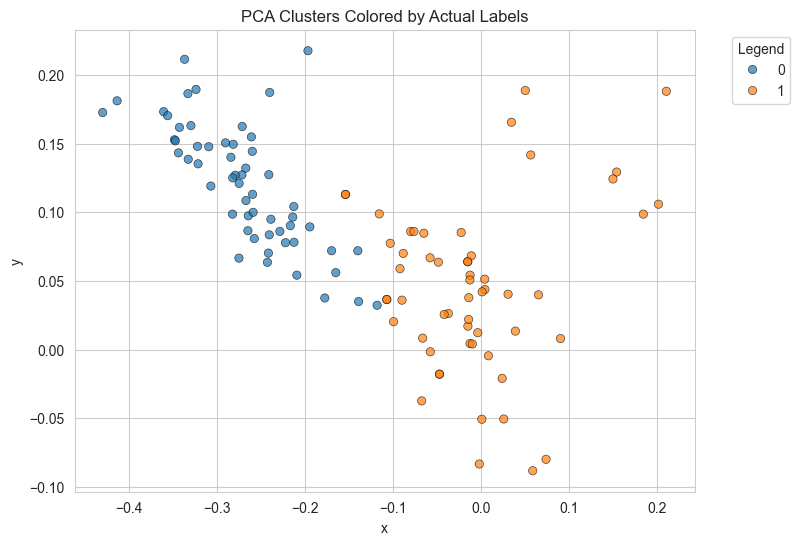

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'x': new_projection[:, 0],
    'y': new_projection[:, 1],
    'label': test1_text["scam_flag"]
})

sns.set_style("whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(
    data=df, x='x', y='y', hue='label', palette='tab10', alpha=0.7, edgecolor="black"
)

plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA Clusters Colored by Actual Labels')
plt.show()

In [10]:
from sklearn.cluster import KMeans

n_clusters = 2

start_time = time.time()
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(new_projection)
end_time = time.time()

kmeans_time = end_time - start_time

In [11]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix


def match_cluster_labels(true_labels, kmeans_labels):
    """
    matching cluster labels to achieve comparable cluster assignments.
    """
    conf_matrix = confusion_matrix(true_labels, kmeans_labels)

    row_ind, col_ind = linear_sum_assignment(-conf_matrix)

    label_mapping = {old: new for old, new in zip(col_ind, row_ind)}

    new_kmeans_labels = np.array([label_mapping[label] for label in kmeans_labels])

    return new_kmeans_labels

# Usage
corrected_labels = match_cluster_labels(test1_text["scam_flag"], labels)


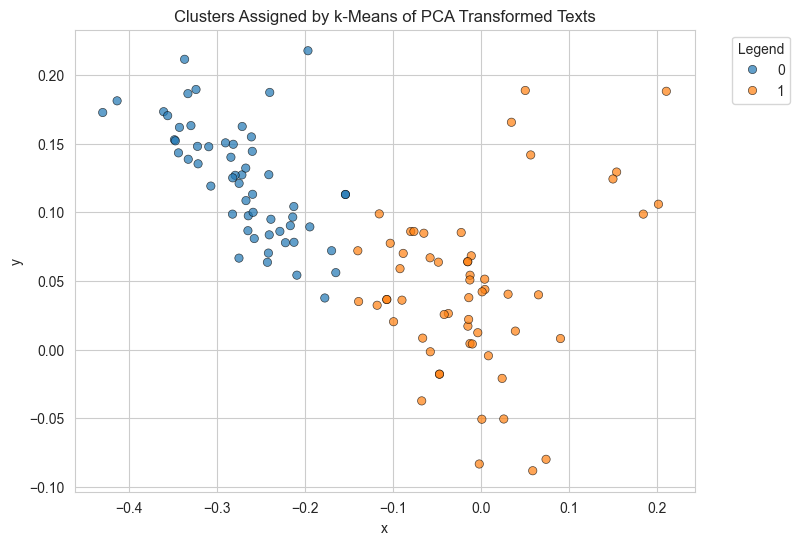

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'x': new_projection[:, 0],
    'y': new_projection[:, 1],
    'label': corrected_labels
})

sns.set_style("whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(
    data=df, x='x', y='y', hue='label', palette='tab10', alpha=0.7, edgecolor="black"
)

plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Clusters Assigned by k-Means of PCA Transformed Texts')
plt.show()

In [13]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

nmi = normalized_mutual_info_score(test1_text["scam_flag"], corrected_labels)
print(f"Normalized Mutual Information: {nmi}")
ari = adjusted_rand_score(test1_text["scam_flag"], corrected_labels)
print(f"Adjusted Rand Index: {ari}")
silhouette_score = silhouette_score(new_projection, corrected_labels)
print(f"Silhouette Score: {silhouette_score}")

Normalized Mutual Information: 0.7397740716072863
Adjusted Rand Index: 0.8293165950590763
Silhouette Score: 0.6060580666001089


In [14]:
print("Total Time:", kmeans_time + transform_time, " seconds")

Total Time: 0.018827199935913086  seconds
